<a href="https://colab.research.google.com/github/anuramvarma/Obsidian/blob/main/DWDM/14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First five records of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Cluster Centers:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]

Cluster assignments for first 10 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3   

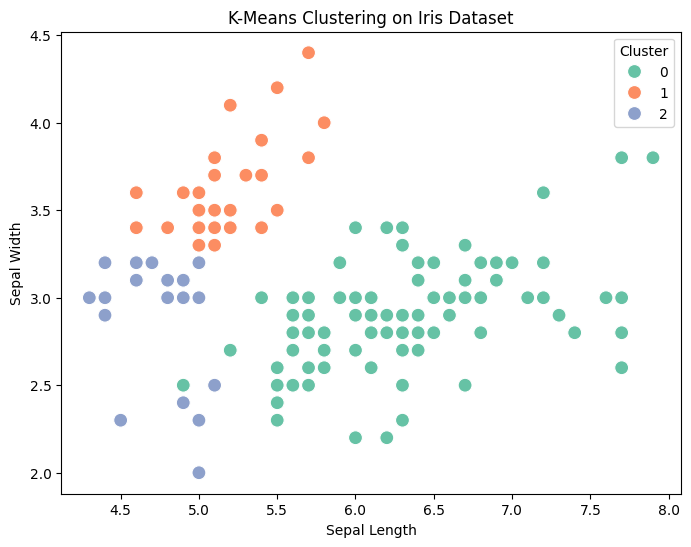


Comparison with actual species:
Actual    0   1   2
Cluster            
0         0  46  50
1        33   0   0
2        17   4   0


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Iris dataset)
from sklearn.datasets import load_iris
iris = load_iris()

# Convert to DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)

print("First five records of the dataset:")
print(data.head())

# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 2: Apply K-Means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Step 3: Add cluster labels to DataFrame
data['Cluster'] = kmeans.labels_

print("\nCluster Centers:")
print(kmeans.cluster_centers_)

print("\nCluster assignments for first 10 rows:")
print(data.head(10))

# Step 4: Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data.iloc[:,0], y=data.iloc[:,1], hue=data['Cluster'], palette='Set2', s=100)
91
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


# Step 5: Compare with original species
print("\nComparison with actual species:")
comparison = pd.DataFrame({'Cluster': kmeans.labels_, 'Actual': iris.target})
print(pd.crosstab(comparison['Cluster'], comparison['Actual']))